In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

In [2]:
from mallows.metrics import KendallTau
from mallows.utils import estimate_mean, estimate_theta
import numpy as np
import itertools
from mallows.distribution import Mallows
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
metric = KendallTau(8)

In [4]:
metric(np.arange(8), np.array([0,1,2,3,5,4,7,6]))

2

In [5]:
distr = Mallows(np.arange(5), 0.1, KendallTau(5))

In [6]:
probabilities = []
metric = KendallTau(5)

for perm in itertools.permutations(np.arange(5)):
    probabilities.append((metric(np.arange(5), perm), distr.probability(perm)))

In [7]:
distinct_values = list(sorted(set(probabilities), key=lambda x: x[0]))

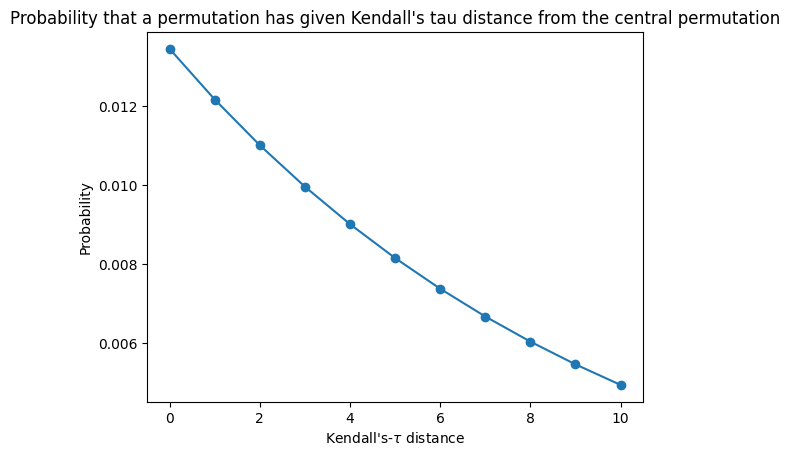

In [8]:
plt.plot([x[0] for x in distinct_values], [x[1] for x in distinct_values], marker='o')
plt.title("Probability that a permutation has given Kendall's tau distance from the central permutation")
plt.xlabel(r"Kendall's-$\tau$ distance")
plt.ylabel("Probability")
plt.show()

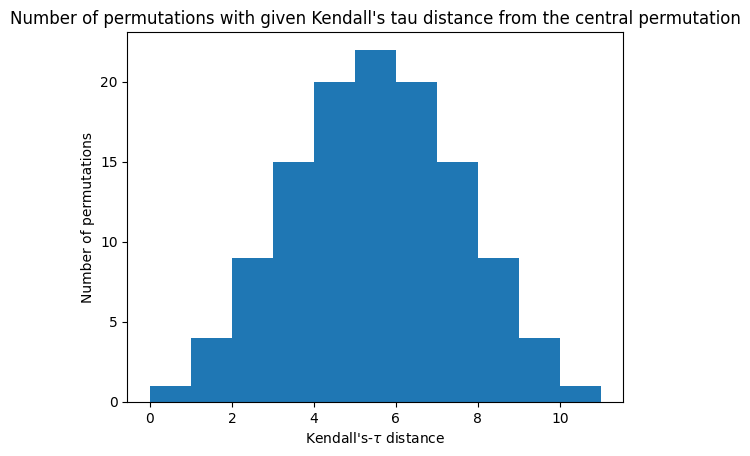

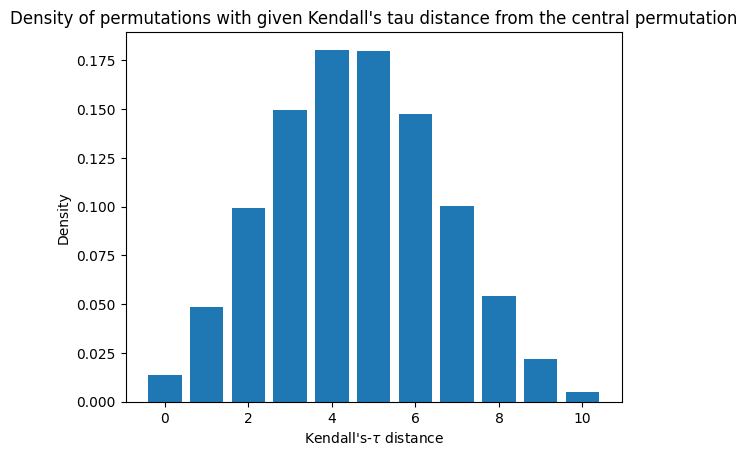

In [9]:
n_elems, dist, _ = plt.hist([x[0] for x in probabilities], bins=range(12))
plt.title("Number of permutations with given Kendall's tau distance from the central permutation")
plt.xlabel(r"Kendall's-$\tau$ distance")
plt.ylabel("Number of permutations")
plt.show()

density = n_elems * np.array([x[1] for x in distinct_values])
plt.bar(range(0,11),density)
plt.title("Density of permutations with given Kendall's tau distance from the central permutation")
plt.xlabel(r"Kendall's-$\tau$ distance")
plt.ylabel("Density")
plt.show()

In [10]:
distances = []

for i in tqdm(range(400000)):
    perm = distr.sample()
    distances.append(metric(np.arange(5), perm))

  0%|          | 0/400000 [00:00<?, ?it/s]

100%|██████████| 400000/400000 [01:04<00:00, 6193.91it/s]


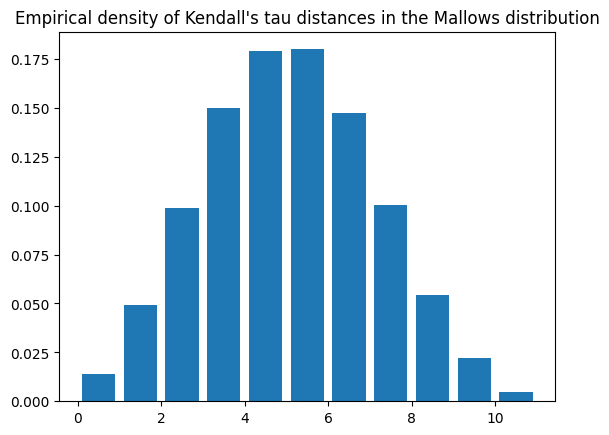

In [11]:
plt.hist(distances, bins=range(12), density=True, rwidth=0.8)
plt.title("Empirical density of Kendall's tau distances in the Mallows distribution")
plt.show()

In [12]:
# TODO: test the empirical distribution against the real one

## Estimation of cetral permutation

In [13]:
metric = KendallTau(10)
distribution = Mallows(np.array([1,2,3,4,5,6,7,8,9,0]), 0.1, metric)

samples = distribution.sample_n(3000)

In [14]:
estimate_mean(samples)

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

## Estimation of dispersion parameter

In [15]:
metric = KendallTau(50)
central_perm = np.arange(50)
distribution = Mallows(central_perm, 0.1, metric)

samples = distribution.sample_n(10000)

estimate_theta(samples, central_perm)

0.10009743978667791